In [1]:
import sys; print('Python \t\t{0[0]}.{0[1]}'.format(sys.version_info))
import tensorflow as tf; print('Tensorflow \t{}'.format(tf.__version__))

Python 		3.6
Tensorflow 	1.0.0


In [2]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../mnist-data/", one_hot=True)

Extracting ../mnist-data/train-images-idx3-ubyte.gz
Extracting ../mnist-data/train-labels-idx1-ubyte.gz
Extracting ../mnist-data/t10k-images-idx3-ubyte.gz
Extracting ../mnist-data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.images.shape

(55000, 784)

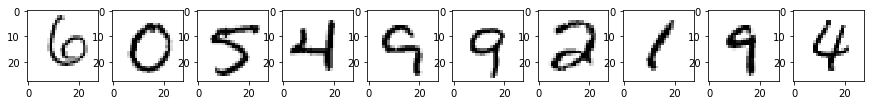

In [5]:
plt.figure(figsize=(15,5))
for i in list(range(10)):
    plt.subplot(1, 10, i+1)
    pixels = mnist.test.images[i+100]
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')
plt.show()

In [6]:
import tflearn as tfl

hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)


In [7]:
# Building slp network
network = tfl.input_data(shape=[None, 784], name='input')
network = tfl.fully_connected(network, 10, activation='softmax')
network = tfl.regression(network, optimizer='adam', learning_rate=0.01,
                     loss='categorical_crossentropy', name='target')

# Training
model = tfl.DNN(network, tensorboard_verbose=0, tensorboard_dir="./tensorboard/tfl")
model.fit({'input': mnist.train.images}, {'target': mnist.train.labels}, n_epoch=10,
           validation_set=({'input': mnist.test.images}, {'target': mnist.test.labels}),
           snapshot_step=500, show_metric=True, run_id='slp_mnist')

Training Step: 8599  | total loss: 0.22827 | time: 4.102s
| Adam | epoch: 010 | loss: 0.22827 - acc: 0.9337 -- iter: 54976/55000
Training Step: 8600  | total loss: 0.23009 | time: 5.154s
| Adam | epoch: 010 | loss: 0.23009 - acc: 0.9357 | val_loss: 0.31634 - val_acc: 0.9225 -- iter: 55000/55000
--


In [8]:
# evaluation
model.evaluate(mnist.test.images, mnist.test.labels)

[0.92249999999999999]

In [9]:
# test item #100 is a "six"
pixels = mnist.test.images[100]

result = model.predict([pixels])
dict(zip(range(10), result[0]))

{0: 2.397350726823788e-06,
 1: 0.0007825364009477198,
 2: 0.03597689047455788,
 3: 0.00019160288502462208,
 4: 1.4806926174060209e-06,
 5: 3.931336323148571e-07,
 6: 0.9630403518676758,
 7: 3.8995090489990503e-10,
 8: 4.15785689256154e-06,
 9: 2.1142336947832518e-07}

In [10]:
def test_render(pixels, result, truth):
    #pixels, result and truth are np vectors
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')

    plt.subplot(1, 2, 2)
    
    #index, witdh
    ind = np.arange(len(result))
    width = 0.49

    plt.barh(ind,result, width, color='orange', edgecolor='k', hatch="/")
    plt.barh(ind+width,truth,width, color='g', edgecolor='k')
    plt.yticks(ind+width, range(10))
    plt.margins(y=0)

    plt.show()

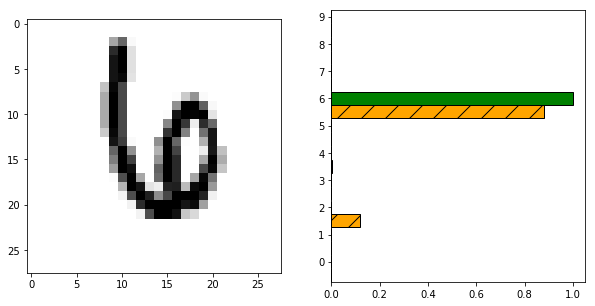

In [11]:
import random
i = random.randint(0,mnist.test.images.shape[0])

pixels = mnist.test.images[i]
truth  = mnist.test.labels[i]
result = model.predict([pixels])[0]

test_render(pixels, result, truth)